In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
from collections import Counter

In [2]:

df = pd.read_csv('combined_dta.csv', encoding='ISO-8859-1', low_memory=False)

In [3]:
df.head()

web-scraper-order                          web-scraper-start-url  \
0      1730407108-1  https://www.jumia.co.ke/computer-accessories/   
1      1730407112-2  https://www.jumia.co.ke/computer-accessories/   
2      1730407112-3  https://www.jumia.co.ke/computer-accessories/   
3      1730407114-4  https://www.jumia.co.ke/computer-accessories/   
4      1730407116-5  https://www.jumia.co.ke/computer-accessories/   

                                             product  \
0  Black Friday dealLaptop Skin Wrap Vinyl from 1...   
1  Black Friday deal9"-17" Laptop Cooling Stand P...   
2  Black Friday deal9"-17" Laptop Cooling Stand P...   
3  Black Friday dealLexar 2.5" SATA 256GB Laptop ...   
4      WD External Portable Hard Drive-2TBKSh 15,000   

                                        product-href  \
0  https://www.jumia.co.ke/generic-laptop-skin-wr...   
1  https://www.jumia.co.ke/9-17-laptop-cooling-st...   
2  https://www.jumia.co.ke/9-17-laptop-cooling-st...   
3  https://www.jumia.co.ke/lexar-2.5-sata-256gb-l...   
4  https://www.jumia.co.ke/wd-external-portable-h...   

                                        product_name  \
0  Laptop Skin Wrap Vinyl from 12-17.0 inches Lap...   
1                    9"-17" Laptop Cooling Stand Pad   
2                    9"-17" Laptop Cooling Stand Pad   
3                   Lexar 2.5" SATA 256GB Laptop SSD   
4                WD External Portable Hard Drive-2TB   

                                               image              price  \
0  https://ke.jumia.is/unsafe/fit-in/680x680/filt...  KSh 699 - KSh 797   
1  https://ke.jumia.is/unsafe/fit-in/680x680/filt...          KSh 3,325   
2  https://ke.jumia.is/unsafe/fit-in/680x680/filt...          KSh 3,325   
3  https://ke.jumia.is/unsafe/fit-in/680x680/filt...          KSh 3,799   
4  https://ke.jumia.is/unsafe/fit-in/680x680/filt...         KSh 15,000   

   brand link                                          link-href  see_all  \
0    NaN  NaN  https://www.jumia.co.ke/computer-accessories/?...      NaN   
1    NaN  NaN  https://www.jumia.co.ke/computer-accessories/?...  See All   
2    NaN  NaN  https://www.jumia.co.ke/computer-accessories/?...  See All   
3  Lexar  NaN  https://www.jumia.co.ke/computer-accessories/?...      NaN   
4     WD  NaN  https://www.jumia.co.ke/computer-accessories/?...      NaN   

                                        see_all-href review_title  \
0                                                NaN          NaN   
1  https://www.jumia.co.ke/catalog/productratings...         OKAY   
2  https://www.jumia.co.ke/catalog/productratings...         okay   
3                                                NaN          NaN   
4                                                NaN          NaN   

                                              review     ratings   user_name  \
0                                                NaN         NaN         NaN   
1                               Working, feels cheap  3 out of 5  by WILFRED   
2  A bit big for a regular laptop bag... The fanc...  4 out of 5  by Michael   
3                                                NaN         NaN         NaN   
4                                                NaN         NaN         NaN   

         date see_all_link see_all_link-href   Category  
0         NaN          NaN               NaN  Computing  
1  28/04/2022          NaN               NaN  Computing  
2    8/7/2021          NaN               NaN  Computing  
3         NaN          NaN               NaN  Computing  
4         NaN          NaN               NaN  Computing

In [4]:
df.shape

(60464, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60464 entries, 0 to 60463
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      60464 non-null  object
 1   web-scraper-start-url  60464 non-null  object
 2   product                60464 non-null  object
 3   product-href           60464 non-null  object
 4   product_name           60459 non-null  object
 5   image                  60330 non-null  object
 6   price                  60330 non-null  object
 7   brand                  39584 non-null  object
 8   link                   28139 non-null  object
 9   link-href              36020 non-null  object
 10  see_all                40431 non-null  object
 11  see_all-href           40425 non-null  object
 12  review_title           37705 non-null  object
 13  review                 40201 non-null  object
 14  ratings                37618 non-null  object
 15  user_name          

In [6]:
df.duplicated().values.any()

True

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().values.any()

False

In [9]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'product', 'product-href',
       'product_name', 'image', 'price', 'brand', 'link', 'link-href',
       'see_all', 'see_all-href', 'review_title', 'review', 'ratings',
       'user_name', 'date', 'see_all_link', 'see_all_link-href', 'Category'],
      dtype='object')

In [10]:
columns_to_drop = ['see_all_link', 'see_all_link-href', 'see_all', 'see_all-href', 'link', 'link-href']

In [11]:
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.isnull().sum()

web-scraper-order            0
web-scraper-start-url        0
product                      0
product-href                 0
product_name                 5
image                      130
price                      130
brand                    20880
review_title             22755
review                   20259
ratings                  22842
user_name                22842
date                     22842
Category                     0
dtype: int64

In [13]:
df.describe()

web-scraper-order  \
count                                               60411   
unique                                              60150   
top     https://www.jumia.co.ke/ps4-pad-dual-shock-4-w...   
freq                                                   13   

                         web-scraper-start-url  \
count                                    60411   
unique                                     248   
top     https://www.jumia.co.ke/mobile-phones/   
freq                                      1448   

                                                  product  \
count                                               60411   
unique                                              25445   
top     Black Friday dealOut of StockOfficial StoreHis...   
freq                                                  192   

                                             product-href  \
count                                               60411   
unique                                              26684   
top     https://www.jumia.co.ke/hisense-ax-3100g-3.1ch...   
freq                                                  192   

                                             product_name  \
count                                               60406   
unique                                              22858   
top     Hisense AX-3100G 3.1ch Dolby Atmos Home Cinema...   
freq                                                  192   

                                                    image    price    brand  \
count                                               60281    60281    39531   
unique                                              26617     7993     1692   
top     https://ke.jumia.is/unsafe/fit-in/680x680/filt...  KSh 999  Fashion   
freq                                                  192      528    10798   

       review_title review     ratings user_name        date Category  
count         37656  40152       37569     37569       37569    60411  
unique        13112  25620           6      9230        1927       14  
top       I like it   Good  5 out of 5  by Brian  11/10/2024  Fashion  
freq           3381    309       21667       363         469    11656

In [14]:
# Function to extract numeric rating from a string
def extract_rating(rating):
    match = re.search(r'\d+', str(rating))  # Finding the first digit in the string
    if match:
        return float(match.group())  # Convert the first digit to float
    return None  # Return None if no digit is found

In [15]:
# Apply the function to the ratings column
df['ratings'] = df['ratings'].apply(extract_rating)

In [16]:
df.dropna(subset=['ratings'], inplace=True)

In [17]:
# Remove "by" from the username
def remove_by_prefix(user_name):

    return user_name.replace("by ", "", 1)

In [18]:
df['user_name'] = df['user_name'].apply(remove_by_prefix)

In [19]:
def convert_price(price):
    # Remove non-numeric characters (i.e.currency symbols)
    cleaned_price = re.sub(r"[^\d.-]", "", str(price))
    
    # Handle ranges
    if '-' in cleaned_price:
        try:
            low, high = map(float, cleaned_price.split('-'))
            return (low + high) / 2
        except ValueError:
            return None  # Return None if conversion fails
    else:
        try:
            return float(cleaned_price)  # Convert single prices to float
        except ValueError:
            return None

In [20]:
# Apply the conversion function to the price column
df['price'] = df['price'].apply(convert_price)

In [21]:
# Remove any rows with missing values in the Review column
df.dropna(subset=['review'], inplace=True)

In [22]:
# Convert the Review column to lowercase
df['review'] = df['review'].apply(lambda x: x.lower())

In [23]:
# Remove any special characters and numbers from the Review column
df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [24]:
# Tokenize the Review column
df['review'] = df['review'].apply(lambda x: nltk.word_tokenize(x))

In [25]:
# Remove any stopwords from the Review column
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: [word for word in x if word not in stop_words])

In [26]:
# Lemmatize the Review column
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [27]:
# Join the Review column back into a string
df['review'] = df['review'].apply(lambda x: ' '.join(x))

In [28]:
# Remove any rows with missing values in the Review Title column
df.dropna(subset=['review_title'], inplace=True)

# Convert the Review Title column to lowercase
df['review_title'] = df['review_title'].apply(lambda x: x.lower())

# Remove any special characters and numbers from the Review Title column
df['review_title'] = df['review_title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tokenize the Review Title column
df['review_title'] = df['review_title'].apply(lambda x: nltk.word_tokenize(x))

# Remove any stopwords from the Review Title column
stop_words = set(stopwords.words('english'))
df['review_title'] = df['review_title'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize the Review Title column
lemmatizer = WordNetLemmatizer()
df['review_title'] = df['review_title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the Review Title column back into a string
df['review_title'] = df['review_title'].apply(lambda x: ' '.join(x))

In [29]:
# Highest rated product
highest_rated_product = df.loc[df['ratings'].idxmax()]
print(f'Highest Rated Product: {highest_rated_product["product_name"]} - {highest_rated_product["ratings"]}')

Highest Rated Product: Safaricom, Airtel & Telkom -4G/3G Universal Modem - 5.0


In [30]:
# Group products by rating and calculate the count
rating_counts = df['ratings'].value_counts()
print('Rating Counts:')
print(rating_counts)

Rating Counts:
ratings
5.0    21655
4.0     6415
1.0     4036
3.0     3452
2.0     1968
Name: count, dtype: int64


In [31]:
def calculate_descriptive_statistics(df, columns):

    for column in columns:
        if column in df.columns:
            stats = df[column].describe()
            print(f'{column} Statistics:')
            print(stats)
            print()  
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

In [32]:
calculate_descriptive_statistics(df, ['price', 'ratings', 'review'])

price Statistics:
count     37526.000000
mean       3462.646832
std        7063.886468
min          51.000000
25%         620.000000
50%        1050.000000
75%        2280.000000
max      186000.000000
Name: price, dtype: float64

ratings Statistics:
count    37526.000000
mean         4.057533
std          1.357770
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

review Statistics:
count     37526
unique    21310
top        good
freq        841
Name: review, dtype: object



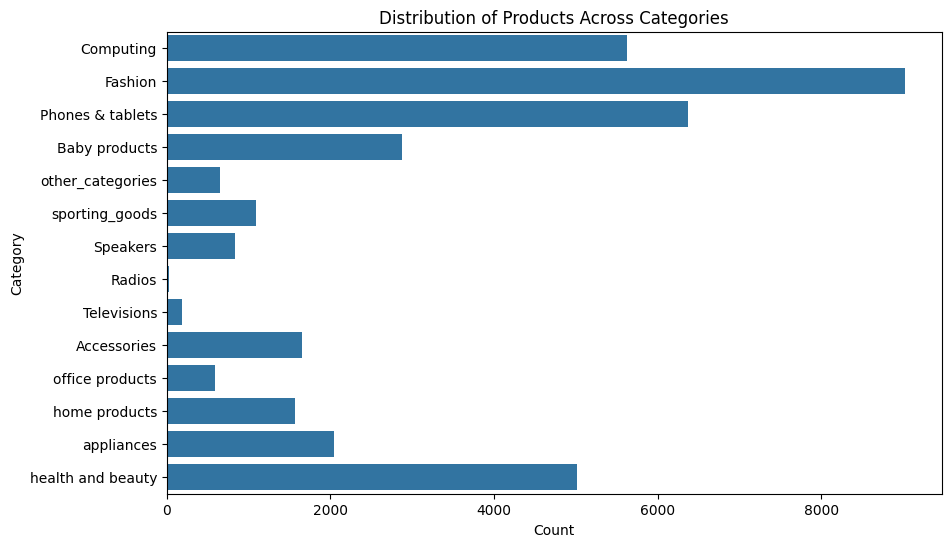

In [33]:
# Categorical column
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df)
plt.title('Distribution of Products Across Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show();

In [34]:
# Distribution Analysis
def plot_distribution(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=50)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

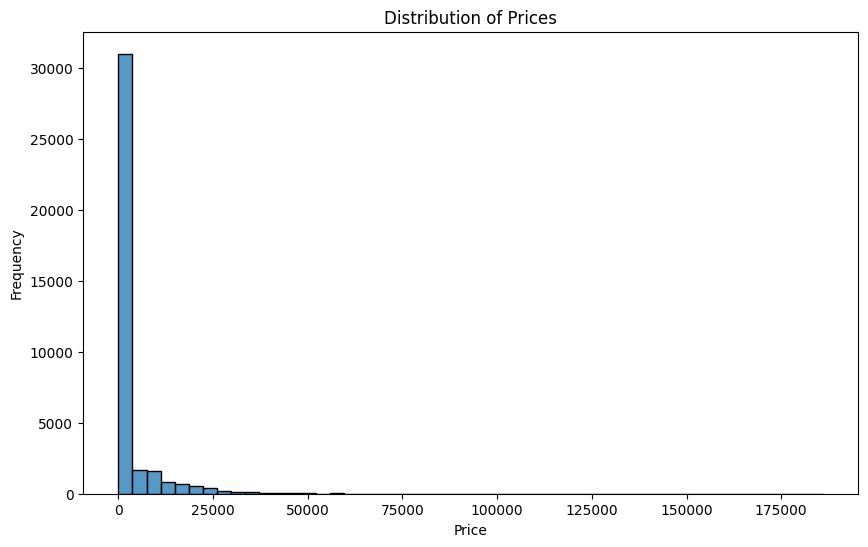

In [35]:
plot_distribution(df['price'], 'Distribution of Prices', 'Price', 'Frequency')

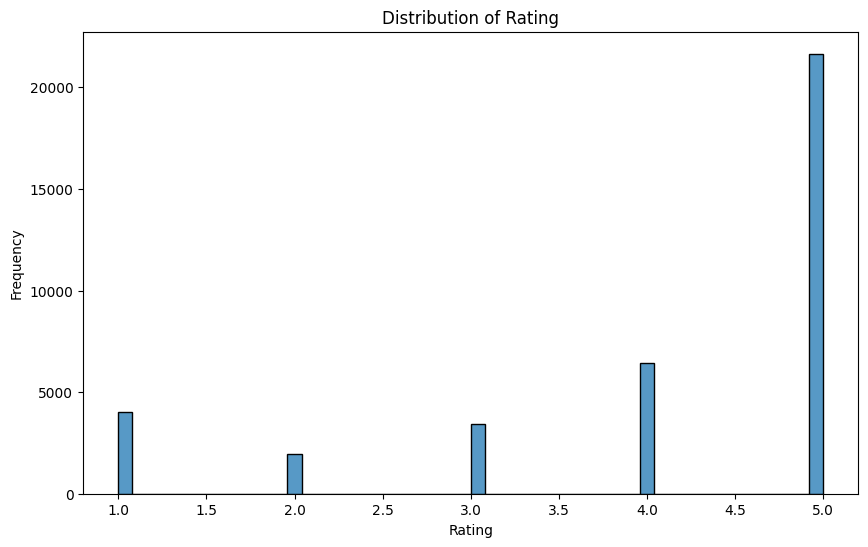

In [36]:
plot_distribution(df['ratings'], 'Distribution of Rating', 'Rating', 'Frequency')

In [37]:
# Calculate the length of the Review column
df['review_length'] = df['review'].apply(lambda x: len(x))

In [38]:
df['review_title_length'] = df['review_title'].apply(lambda x: len(x))

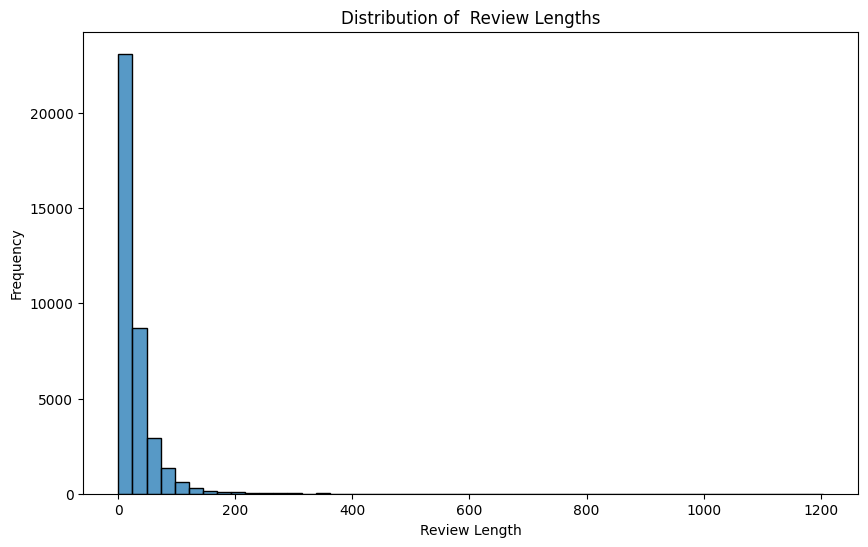

In [39]:
plot_distribution(df['review_length'], 'Distribution of  Review Lengths', 'Review Length', 'Frequency')

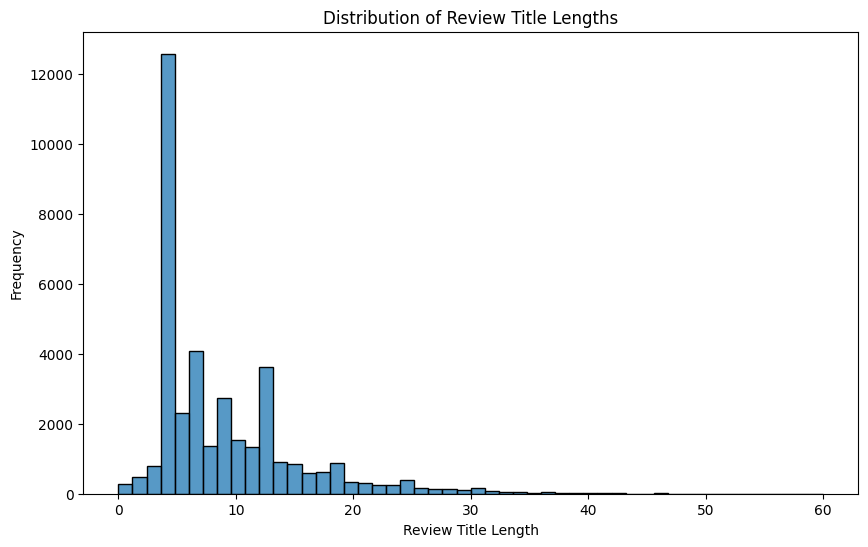

In [40]:
plot_distribution(df['review_title_length'], 'Distribution of Review Title Lengths', 'Review Title Length', 'Frequency')

In [41]:
# Interactive scatter plot of the 'Price' column vs the 'Rating' column
fig = px.scatter(df, x='price', y='ratings', hover_name='product_name')
fig.update_layout(title='Interactive Scatter Plot of Price vs Rating')
fig.show();

In [42]:
def generate_word_cloud(df, column_name):
    
   # Join all the text in the specified column into a single string
    text = ' '.join(df[column_name].dropna()) 
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
    plt.title(f'Word Cloud for {column_name}', fontsize=16)
    plt.show();

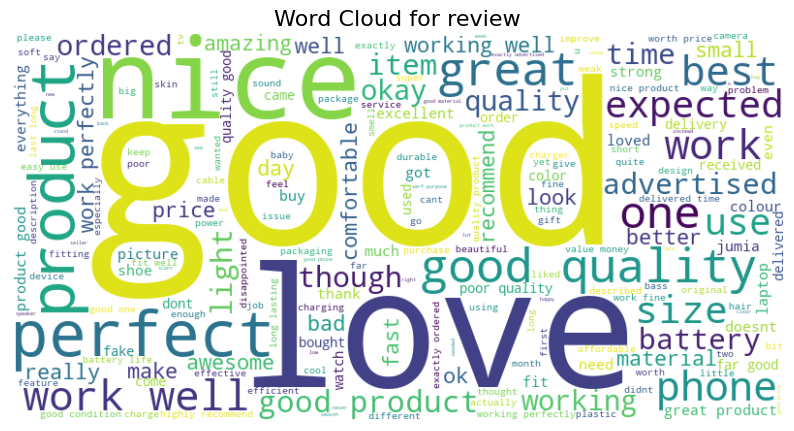

In [43]:
 generate_word_cloud(df, 'review')

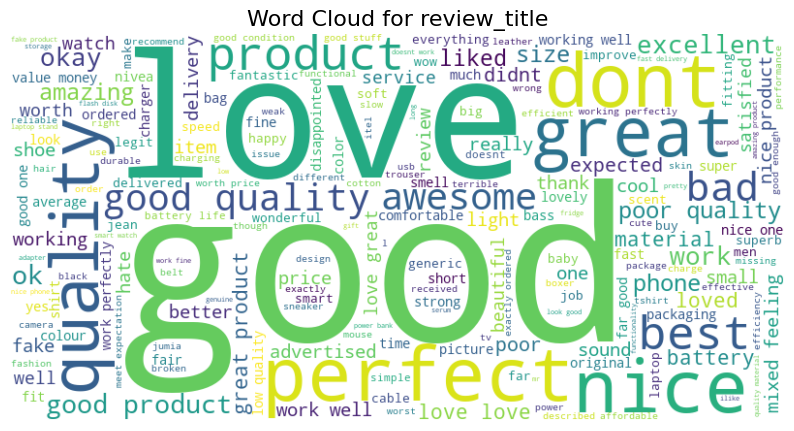

In [44]:
generate_word_cloud(df, 'review_title')

In [45]:
def plot_top_words(df, column_name):

    words = ' '.join(df[column_name].dropna()).split()    

    # frequency of each word
    word_counts = Counter(words) 

    top_10_words = word_counts.most_common(10)    


    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word for word, count in top_10_words], y=[count for word, count in top_10_words])
    plt.title(f'Top 10 Most Common Words in {column_name}', fontsize=16)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=90)
    plt.show();

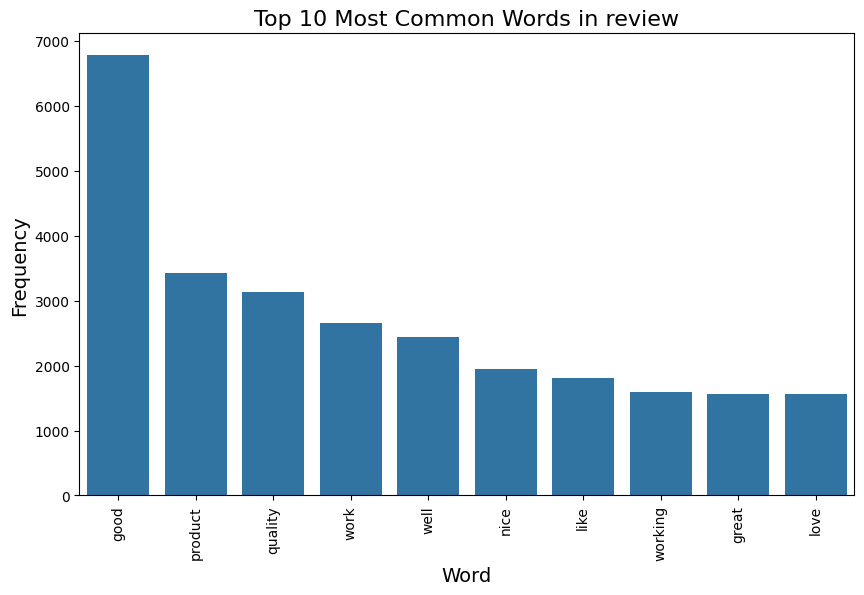

In [46]:
plot_top_words(df, 'review') 

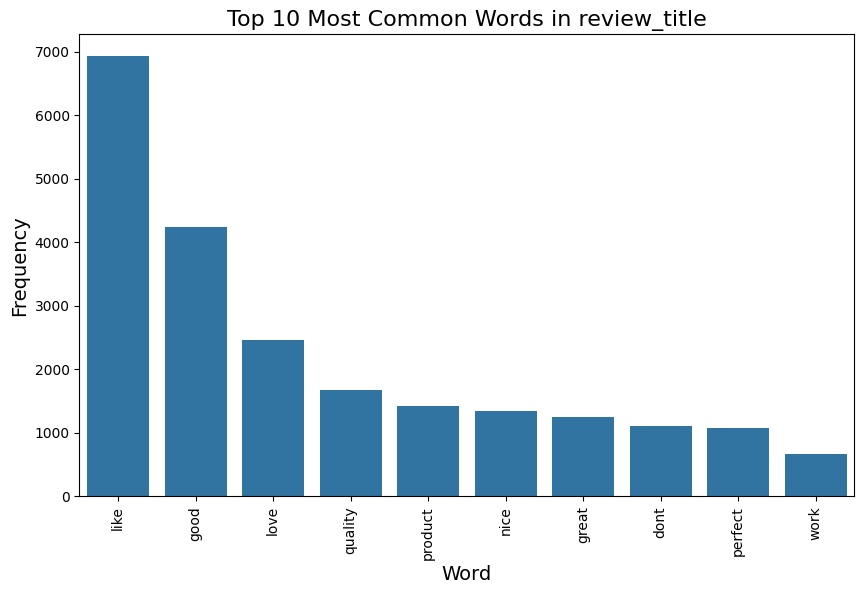

In [47]:
plot_top_words(df, 'review_title') 